In [4]:
import matplotlib.pyplot as plt
import numpy as np
import wave
from playsound import playsound

def DTFT(y,M,a,N,W):
    Y = [0 for i in range(N)]
    for i in range(N):
        for k in range(M):
            Y[i] += y[k]*np.exp((-1j)*W[i]*(a+k))
    return Y

def de_to_H(M_de,a_k,N_de,b_k):
    H = [0 for i in range(N)]
    for j in range(N):
        S_a = 0
        S_b = 0
        for i in range(M_de):
            S_a += a_k[i]*np.exp(-1j*W[j]*i)
        for i in range(N_de):
            S_b += b_k[i]*np.exp(-1j*W[j]*i)
        H[j] = S_b/S_a
    return H

def sum_n(X,H,n): #convolution sum for a particular n
    su=0
    for k in range(len(X)):
        if (n-k)>=0 and (n-k)<len(H):
            su=su+X[k]*H[n-k]
    return su

#convolution for the given sequences    
def convolution(X,H):
    Y=[]
    for i in range(len(H)+len(X)-1):
        Y.append(sum_n(X,H,i))
    return Y

def convolution_x(X,H,a_x,a_h):
    x = [i for i in range(a_x+a_h,a_x+a_h+len(X)+len(H)-1)]
    return x

def  convolution_wav(X,H,framerate,nchannels,sampwidth,choice,str_1):
	Y=[]
	for i in range(len(H)+len(X)-1):
		Y.append(sum_n(X,H,i))
    
	for i in range(len(Y)):
		if Y[i]<0:
			Y[i] = 0
		elif Y[i]>255:
			Y[i] = 255
		else:
			Y[i] = round(Y[i])

	Y_arr=np.asarray(Y)	 #list to array
	Y_1=(Y_arr).astype('b') #converting into bytes
	y_n=wave.open(str_1[:-4]+"_conv_with_"+str(choice)+"_seq"+".wav","w")#file of the form: wow_conv_with_1_seq.wav
	y_n.setnchannels(nchannels) #writing the data to a .wav file
	y_n.setsampwidth(sampwidth)
	y_n.setframerate(framerate)
	y_n.writeframes(Y_1.tobytes())
	y_n.close()
	return Y

def grd(H_ph):
    H_grd = [0 for i in range(N)]
    for i in range(1,N-1,1):
        H_grd[i] = (H_ph[i+1]-H_ph[i-1])/(4*np.pi/N)
    
    H_grd[0] = (H_ph[1]-H_ph[0])/(2*np.pi/N)
    H_grd[N-1] = (H_ph[N-1]-H_ph[N-2])/(2*np.pi/N)
    return H_grd

N = 1000
W = np.linspace((-1)*np.pi, np.pi, num=N, endpoint=False)

Enter the number of samples of y[n-k]:3
Enter the values of a_k:
1
2
3
Enter the number of samples of x[n-k]:3
Enter the values of b_k:
1
2
3


No handles with labels found to put in legend.
No handles with labels found to put in legend.


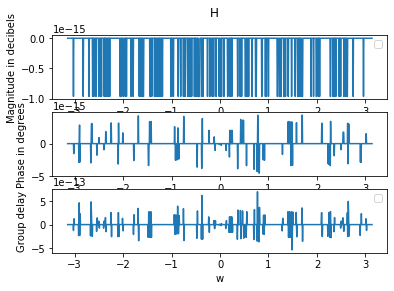

In [5]:
M_de = int(input("Enter the number of samples of y[n-k]:"))
print("Enter the values of a_k:")
a_k = [complex(input()) for i in range(M_de)]
N_de = int(input("Enter the number of samples of x[n-k]:"))
print("Enter the values of b_k:")
b_k = [complex(input()) for i in range(N_de)]

H = de_to_H(M_de,a_k,N_de,b_k)

H_mag = [0 for i in range(N)]
for i in range(N):
    H_mag[i] = 20*np.log10(np.abs(H[i]))

H_ph = [0 for i in range(N)]
for i in range(N):
    H_ph[i] = np.angle(H[i], deg=True)

H_grd = grd(H_ph)

plt.subplot(3,1,1)
plt.plot(W,H_mag)
plt.xlabel('w')
plt.ylabel('Magnitude in decibels')
plt.legend()
plt.subplot(3,1,2)
plt.plot(W,H_ph)
plt.xlabel('w')
plt.ylabel('Phase in degrees')
plt.subplot(3,1,3)
plt.plot(W,H_grd)
plt.xlabel('w')
plt.ylabel('Group delay')
plt.legend()
plt.suptitle("H")
plt.show()



In [ ]:
l = 30
s = [np.sin(np.pi*i)/(np.pi*i) for i in range(l)]
wo = np.pi/2
x = [s[i]*(np.cos(i*wo)+np.cos(2*i*wo)+np.cos(3*i*wo))]

h1 = [0.5,0.5]+[0 for i in range(l-2)]
h2 = [0.5,-0.5]+[0 for i in range(l-2)]

y1 = convolution(x,h1)
y2 = convolution(x,h2)

h1_grd = grd(h1)
h2_grd = grd(h2)

plt.title("H1 group delay")                                
plt.xlabel("w")  
plt.ylabel("Grd")  
plt.plot(W,h1_grd)
plt.show()

plt.title("H2 group delay")                                
plt.xlabel("w")  
plt.ylabel("Grd")  
plt.plot(w,h2_grd)
plt.show()


plt.title("Case (i)")                                
plt.xlabel("n")  
plt.ylabel("Signal Value")  
plt.plot(x)
plt.show()

plt.title("Case (i) - Output")                                
plt.xlabel("n")  
plt.ylabel("Signal Value")  
plt.plot(y1)
plt.show()

plt.title("Case (i)")                                
plt.xlabel("n")  
plt.ylabel("Signal Value")  
plt.plot(x)
plt.show()

plt.title("Case (i) - Output")                                
plt.xlabel("n")  
plt.ylabel("Signal Value")  
plt.plot(y2)
plt.show()

print("Since the group delay for h1 and h2 is constant at 1/2, the signals will be shifted by only half a sample which cannot be seen.")

In [ ]:
str_1 = "alarm.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
h_1 = [-0.5, 1, -0.5, -0.5, 0.5]
a_h = 0
ch = 1
y = convolution_wav(signal,h_1,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [i/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

h1_grd = grd(h1)
plt.title("H1 group delay")                                
plt.xlabel("w")  
plt.ylabel("Grd")  
plt.plot(W,h1_grd)
plt.show()    

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

In [ ]:
str_1 = "alarm.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
h_2 = [0,1]
a_h = 0
ch = 2
y = convolution_wav(signal,h_2,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [i/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

h2_grd = grd(h2)
plt.title("H2 group delay")                                
plt.xlabel("w")  
plt.ylabel("Grd")  
plt.plot(W,h2_grd)
plt.show()    

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

In [ ]:
str_1 = "cry.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
h_1 = [-0.5, 1, -0.5, -0.5, 0.5]
a_h = 0
ch = 1
y = convolution_wav(signal,h_1,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [i/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

h1_grd = grd(h1)
plt.title("H1 group delay")                                
plt.xlabel("w")  
plt.ylabel("Grd")  
plt.plot(W,h1_grd)
plt.show()    

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

In [ ]:
str_1 = "cry.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
h_2 = [0,1]
a_h = 0
ch = 2
y = convolution_wav(signal,h_2,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [i/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

h2_grd = grd(h2)
plt.title("H2 group delay")                                
plt.xlabel("w")  
plt.ylabel("Grd")  
plt.plot(W,h2_grd)
plt.show()    

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

In [ ]:
str_1 = "wow.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
h_1 = [-0.5, 1, -0.5, -0.5, 0.5]
a_h = 0
ch = 1
y = convolution_wav(signal,h_1,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [i/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

h1_grd = grd(h1)
plt.title("H1 group delay")                                
plt.xlabel("w")  
plt.ylabel("Grd")  
plt.plot(W,h1_grd)
plt.show()    

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

In [ ]:
str_1 = "wow.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
h_2 = [0,1]
a_h = 0
ch = 2
y = convolution_wav(signal,h_2,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [i/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

h2_grd = grd(h2)
plt.title("H2 group delay")                                
plt.xlabel("w")  
plt.ylabel("Grd")  
plt.plot(W,h2_grd)
plt.show()    

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

In [ ]:
str_1 = "armageddon.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
h_1 = [-0.5, 1, -0.5, -0.5, 0.5]
a_h = 0
ch = 1
y = convolution_wav(signal,h_1,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [i/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

h1_grd = grd(h1)
plt.title("H1 group delay")                                
plt.xlabel("w")  
plt.ylabel("Grd")  
plt.plot(W,h1_grd)
plt.show()    

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

In [ ]:
str_1 = "armageddon.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
h_2 = [0,1]
a_h = 0
ch = 2
y = convolution_wav(signal,h_2,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [i/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

h2_grd = grd(h2)
plt.title("H2 group delay")                                
plt.xlabel("w")  
plt.ylabel("Grd")  
plt.plot(W,h2_grd)
plt.show()    

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()